In [9]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18363, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-06-21 22:22:43'

- **@author**: run_walker
- **@references**:

# 不可交互

## `matplotlib`

In [2]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_2y_line(df, x, yl, yr=None, 
                 title=None, xlabel_rotation=90,
                 yl_label=None, yr_label=None, 
                 left_color='r', right_color='b', 
                 sort_x=True, ascending=True, 
                 label_size=18, figsize=(16, 6), 
                 markers='ov^<>1234sp*hH+xDd|_.', linestyles=['-', '--', '-.', ':']):
    df = df.copy()
    l = len(df)
    if sort_x:
        df = df.sort_values(x, ascending=ascending)
    # left
    fig, left_ax = plt.subplots(figsize=figsize)
    if isinstance(yl, list):
        markers1 = itertools.cycle(markers)
        ls1 = itertools.cycle(linestyles)
        for y, marker, ls in zip(yl, markers1, ls1):
            left_ax.plot(range(l), df[y], f'{marker}{ls}', c=left_color, label=y)
        left_ax.legend(loc='upper left')
    else:
        left_ax.plot(range(l), df[yl], 'o-', c=left_color)
    left_ax.set_xlabel(x, {'size': label_size})
    if yl_label is not None:
        left_ax.set_ylabel(yl_label, {'size': label_size}, color=left_color)
    else:
        if isinstance(yl, str):
            left_ax.set_ylabel(yl, {'size': label_size}, color=left_color)
    left_ax.tick_params(axis='y', colors=left_color)
    # left_ax.grid(False)
    plt.xticks(range(l), df[x], rotation=xlabel_rotation)
    # right
    if yr is not None:
        right_ax = left_ax.twinx()
        if isinstance(yr, list):
            markers2 = itertools.cycle(markers)
            ls2 = itertools.cycle(linestyles)
            for y, marker, ls in zip(yr, markers2, ls2):
                right_ax.plot(range(l), df[y], f'{marker}{ls}', c=right_color, label=y)
            right_ax.legend(loc='upper right')
        else:
            right_ax.plot(range(l), df[yr], 'o-', c=right_color)
        if yr_label is not None:
            right_ax.set_ylabel(yr_label, {'size': label_size}, color=right_color)
        else:
            if isinstance(yr, str):
                right_ax.set_ylabel(yr, {'size': label_size}, color=right_color)
        right_ax.tick_params(axis='y', colors=right_color)
        right_ax.grid(False)
    #
    if title is not None:
        plt.title(title, fontsize=label_size)
    plt.show();

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'year_month': [201900 + month for month in range(1, 13)] + [202000 + month for month in range(1, 4)],
    'qty1': np.random.random(15) * 1000,
    'qty2': np.random.random(15) * 1000,
    'total_spending1': np.random.random(15) * 100000,
    'total_spending2': np.random.random(15) * 100000
})

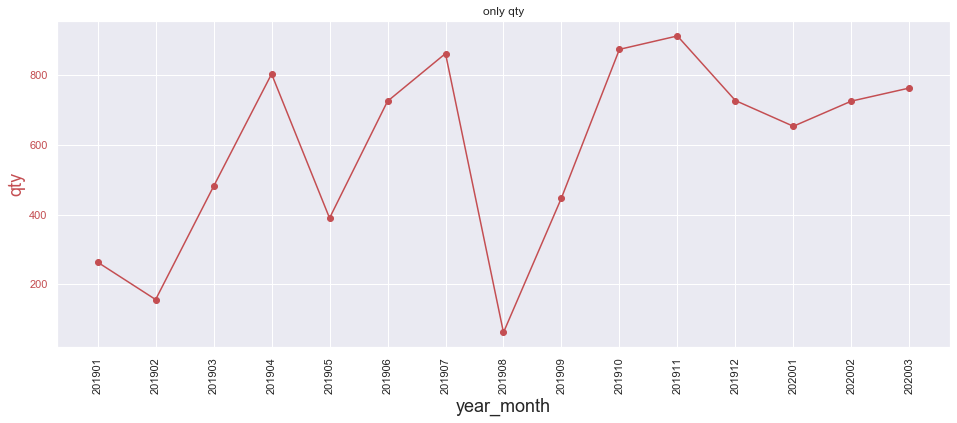

In [8]:
plot_2y_line(df, 'year_month', 'qty1', yl_label='qty', title='only qty')

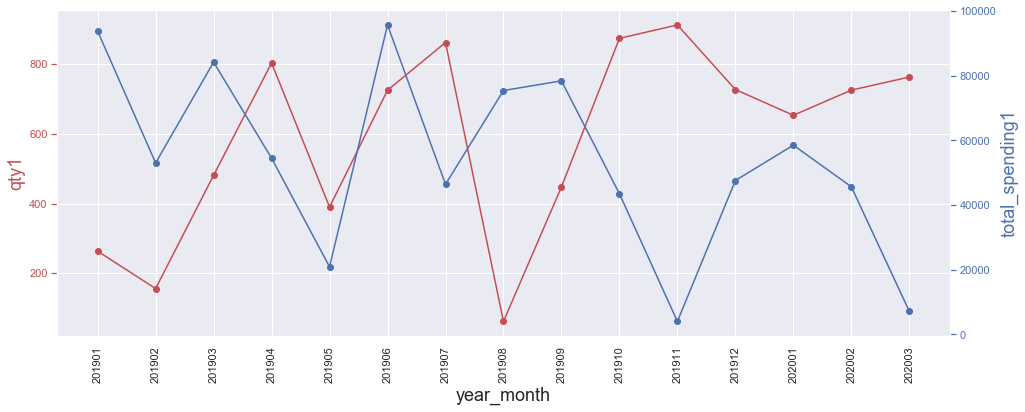

In [4]:
plot_2y_line(df, 'year_month', 'qty1', 'total_spending1')

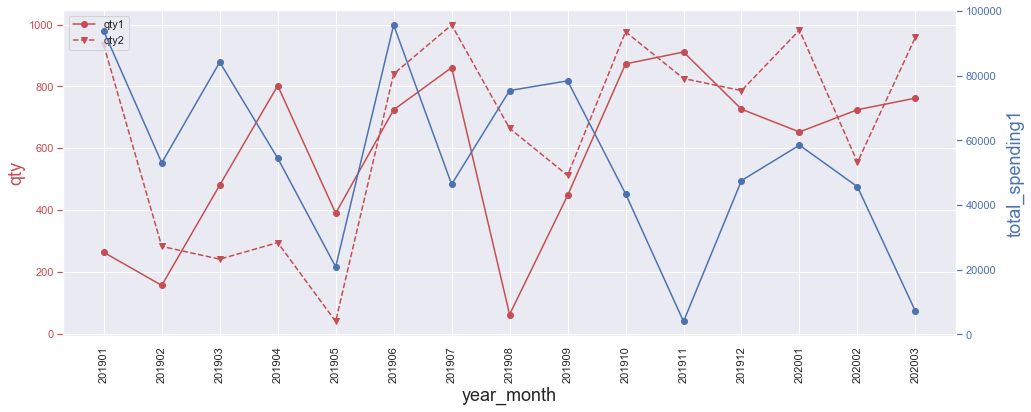

In [5]:
plot_2y_line(df, 'year_month', ['qty1', 'qty2'], 'total_spending1', yl_label='qty')

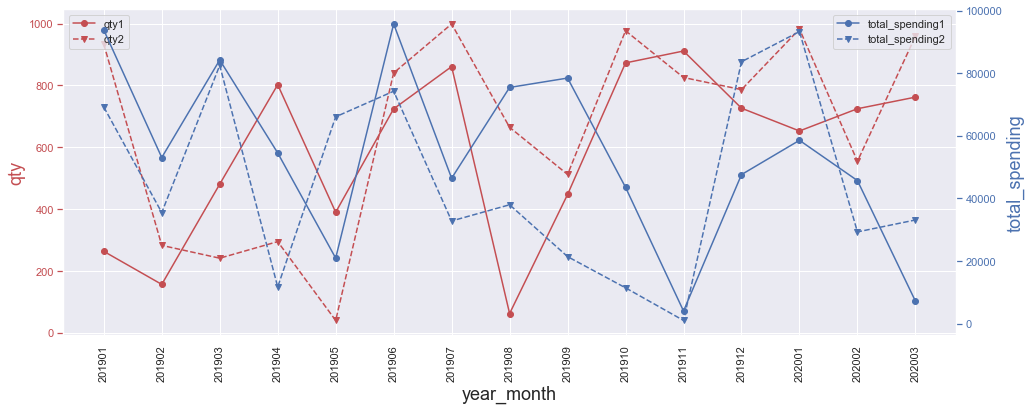

In [6]:
plot_2y_line(df, 'year_month', ['qty1', 'qty2'], ['total_spending1', 'total_spending2'], 
           yl_label='qty', yr_label='total_spending')

# 可交互

## `pyecharts`

<div class="alert alert-block alert-info">
    <i class="fa fa-list-alt" aria-hidden="true"><b> Todo:</b></i>
    功能待开发
</div>